<img src="http://www.basic-concept.com/public/images/uploads/CYBER-BULLYING.png">

# Data Import

In [1]:
#Libraries for accessing and wrangling data
import pandas as pd
import numpy as np

In [2]:
data = pd.read_json('Dataset for Detection of Cyber-Trolls.json', lines=True)
data.head()

,content,annotation,extras
0,Get fucking real dude.,"{'notes': '', 'label': ['1']}",NaN
1,She is as dirty as they come and that crook ...,"{'notes': '', 'label': ['1']}",NaN
2,why did you fuck it up. I could do it all day...,"{'notes': '', 'label': ['1']}",NaN
3,Dude they dont finish enclosing the fucking s...,"{'notes': '', 'label': ['1']}",NaN
4,WTF are you talking about Men? No men thats n...,"{'notes': '', 'label': ['1']}",NaN


In [3]:
data['label'] = data['annotation'].apply(lambda x: x.get('label')[0])
data.head()

,content,annotation,extras,label
0,Get fucking real dude.,"{'notes': '', 'label': ['1']}",NaN,1
1,She is as dirty as they come and that crook ...,"{'notes': '', 'label': ['1']}",NaN,1
2,why did you fuck it up. I could do it all day...,"{'notes': '', 'label': ['1']}",NaN,1
3,Dude they dont finish enclosing the fucking s...,"{'notes': '', 'label': ['1']}",NaN,1
4,WTF are you talking about Men? No men thats n...,"{'notes': '', 'label': ['1']}",NaN,1


In [4]:
data.drop(['annotation', 'extras'], axis=1, inplace=True)
data

,content,label
0,Get fucking real dude.,1
1,She is as dirty as they come and that crook ...,1
2,why did you fuck it up. I could do it all day...,1
3,Dude they dont finish enclosing the fucking s...,1
4,WTF are you talking about Men? No men thats n...,1
...,...,...
19996,I dont. But what is complaining about it goi...,0
19997,Bahah yeah i&;m totally just gonna&; get pis...,0
19998,hahahahaha >:) im evil mwahahahahahahahahaha,0
19999,What&;s something unique about Ohio? :),0


# Exploratory Data Analysis, EDA

In [5]:
#Libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Libraries for word cloud visualization
from wordcloud import WordCloud, STOPWORDS
from PIL import Image
import re

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20001 entries, 0 to 20000
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   content  20001 non-null  object
 1   label    20001 non-null  object
dtypes: object(2)
memory usage: 312.6+ KB


In [7]:
data.shape

(20001, 2)

In [8]:
data.isna().sum()

content    0
label      0
dtype: int64

In [9]:
data.duplicated().sum()

5348

In [10]:
data['label'].value_counts()

0    12179
1     7822
Name: label, dtype: int64

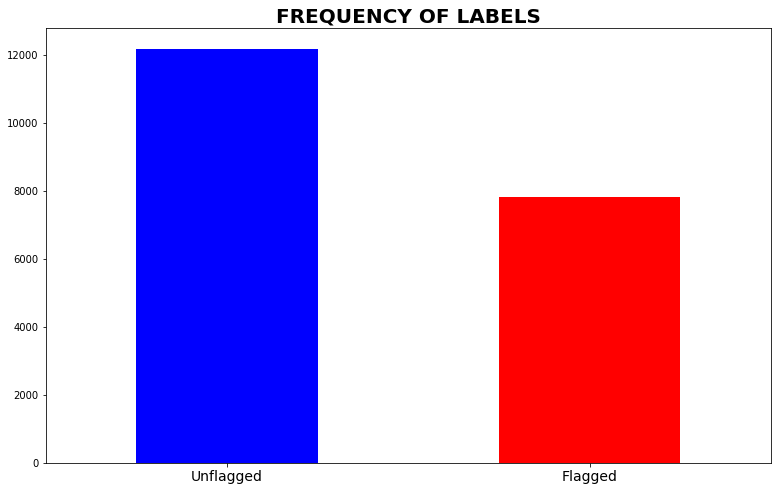

In [11]:
plt.figure(figsize=(13, 8))
data['label'].value_counts().plot(kind='bar', color=['blue', 'red'])
plt.xticks(ticks=[0,1], labels=['Unflagged', 'Flagged'], rotation=0, fontsize=14)
plt.title('FREQUENCY OF LABELS', fontweight='bold', fontsize=20)
plt.show()

### Creating word cloud visual

In [12]:
# instantiating stop words

stop_words = set(STOPWORDS)

In [13]:
## function to create the word cloud

def wordCloud(series, title):
    text = " ".join(series)
    text = re.sub('[^a-zA-Z]', ' ', text)
    text = text.title()
    word_cloud = WordCloud(stopwords=stop_words, background_color='black',
                           colormap='plasma', random_state=42).generate(text)
    plt.figure(figsize=(18,14))
    plt.title(title, fontweight='bold', fontsize=30, color='grey')
    plt.imshow(word_cloud, interpolation='bilinear')
    plt.axis('off')
    return plt.show()

In [14]:
# first 10 rows of the flagged texts
flagged_text = data.loc[data["label"]=='1', 'content']
flagged_text[:10]

0                               Get fucking real dude.
1     She is as dirty as they come  and that crook ...
2     why did you fuck it up. I could do it all day...
3     Dude they dont finish enclosing the fucking s...
4     WTF are you talking about Men? No men thats n...
5    Ill save you the trouble sister. Here comes a ...
6     Im dead serious.Real athletes never cheat don...
7    ...go absolutely insane.hate to be the bearer ...
8    Lmao  im watching the same thing ahaha. The ga...
9    LOL  no he said  What do you call a jail cell ...
Name: content, dtype: object

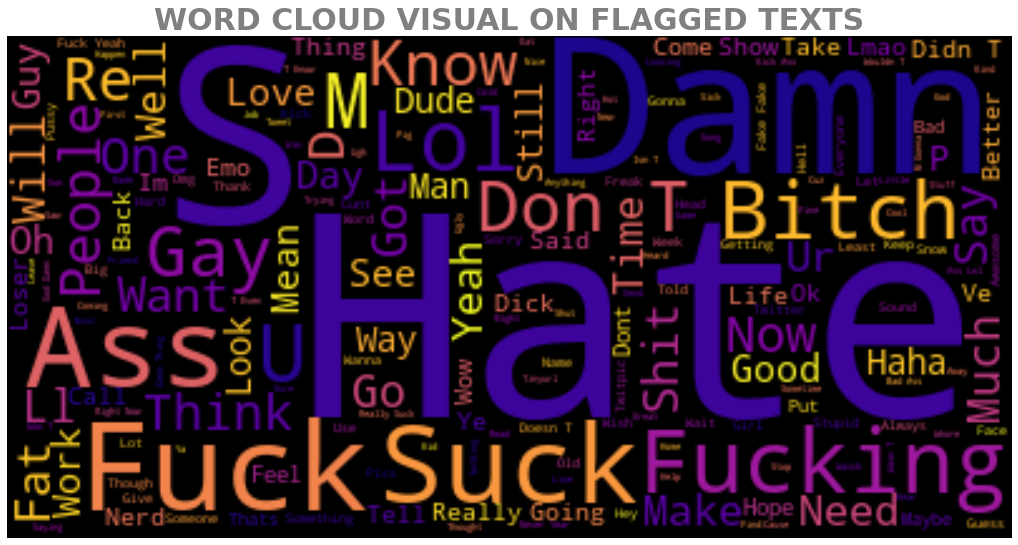

In [15]:
wordCloud(flagged_text, 'WORD CLOUD VISUAL ON FLAGGED TEXTS')

In [16]:
# Top 15 most common words found in the flagged texts...

flagged_text = " ".join(flagged_text)

words = [word.strip() for word in flagged_text.split(' ') if word.lower() not in stop_words]
pd.Series(words).value_counts()[1:15]

hate       1146
ass         694
damn        623
fuck        600
fucking     519
u           378
know        334
sucks       282
lol         262
gay         260
-           243
Damn        219
got         215
want        202
dtype: int64

In [17]:
# first 10 rows of the unflagged texts
unflagged_text = data.loc[data['label']=='0', 'content']
unflagged_text[:10]

7822    yeah I got 2 backups for all that. I just hate...
7823    I hate using my BB  but love my iPhone. Haven'...
7824        wow lol sounds like a lot of piss then hehehe
7825    not a damn thang..the typical rap beef. one pe...
7826    well damn!! where have you been when i have ne...
7827    watching without a trace too...hate when i mis...
7828    which they do most of the time:-P I don't hate...
7829                      haha fuck i wish i was there :(
7830    paranoid is wack as fuck...the best song on 80...
7831    in London  I hate thee :( ENJOY YOURSELVES!!! ...
Name: content, dtype: object

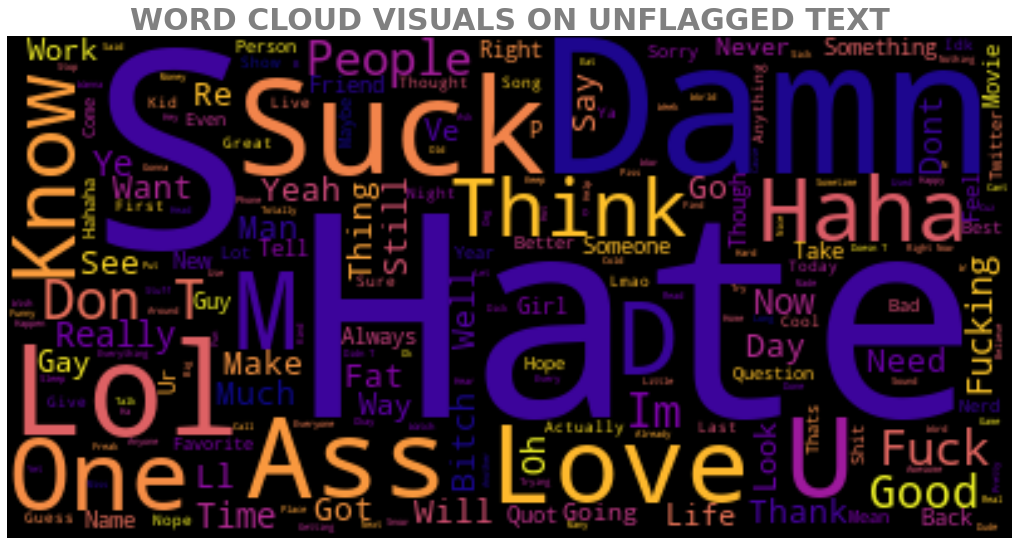

In [18]:
wordCloud(unflagged_text, 'WORD CLOUD VISUALS ON UNFLAGGED TEXT')

In [19]:
# Top 15 most common words found in the flagged texts...

unflagged_texts = " ".join(unflagged_text)

words = [word.strip() for word in unflagged_texts.split(' ') if word.lower() not in stop_words]
pd.Series(words).value_counts()[1:15]

hate      1268
damn       793
:)         563
think      478
ass        473
lol        421
one        419
know       413
love       394
u          393
haha       354
sucks      335
im         327
people     321
dtype: int64

# Data Preprocessing / Cleaning

In [20]:
# Packages for word processing

import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from imblearn.over_sampling import SMOTE

#### -- dropping duplicate values

In [21]:
data.drop_duplicates(inplace=True)

In [22]:
data.duplicated().sum()

0

In [23]:
data.reset_index(drop=True, inplace=True)
data.head()

,content,label
0,Get fucking real dude.,1
1,She is as dirty as they come and that crook ...,1
2,why did you fuck it up. I could do it all day...,1
3,Dude they dont finish enclosing the fucking s...,1
4,WTF are you talking about Men? No men thats n...,1


In [24]:
data.shape

(14653, 2)

In [25]:
data['label'].value_counts()

0    11864
1     2789
Name: label, dtype: int64

#### -- cleaning the unflagged texts of cyberbully texts

In [26]:
# removing possible cyberbully words from the unflagged labels.

data.loc[data['label']=='0', ['content']] = (data[data['label']=='0']['content']
                                       .apply(lambda x: re.sub('suck|ass|bitch|fuck', ' ', x.lower()))
                                       .apply(lambda x: re.sub('[^a-zA-Z]', ' ', x.lower())))

cleaned_unflagged = data.loc[data['label']=='0', 'content']
cleaned_unflagged

2789     yeah i got   backups for all that  i just hate...
2790     i hate using my bb  but love my iphone  haven ...
2791         wow lol sounds like a lot of piss then hehehe
2792     not a damn thang  the typical rap beef  one pe...
2793     well damn   where have you been when i have ne...
                               ...                        
14648      i dont  but what is complaining about it goi...
14649     bahah  yeah i  m totally just gonna   get pis...
14650         hahahahaha     im evil mwahahahahahahahahaha
14651              what  s something unique about ohio    
14652                who is the biggest gossiper you know 
Name: content, Length: 11864, dtype: object

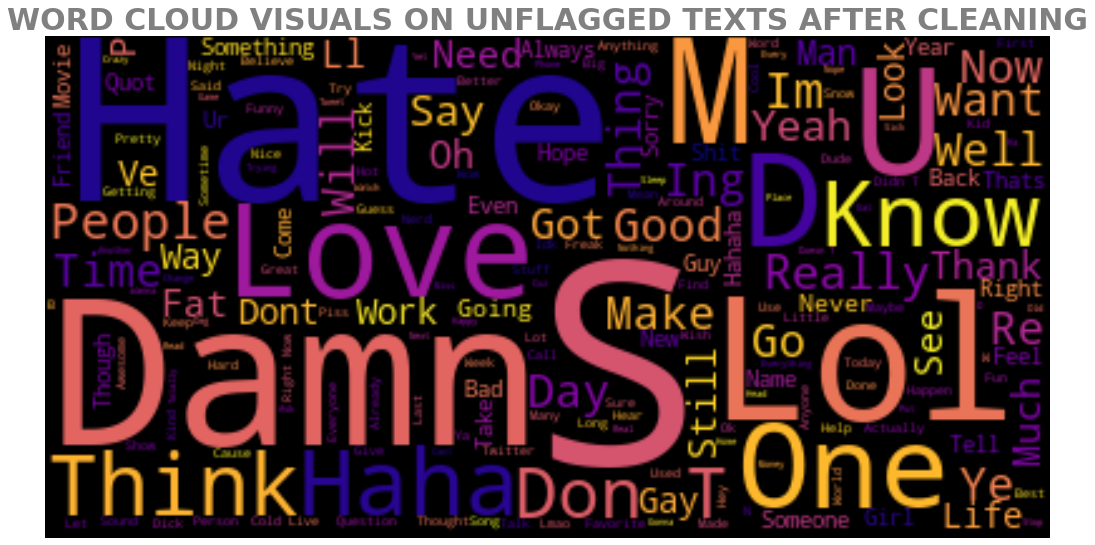

In [27]:
wordCloud(cleaned_unflagged, 'WORD CLOUD VISUALS ON UNFLAGGED TEXTS AFTER CLEANING')

In [28]:
# Top 15 most common words found in the flagged texts after cleaning...
cleaned_unflagged_text = " ".join(cleaned_unflagged)

words = [word.strip() for word in cleaned_unflagged_text.split(' ') if word.lower() not in stop_words]
pd.Series(words).value_counts()[1:15]

s        2210
hate     1502
damn     1373
t        1070
lol       838
m         659
one       515
know      513
think     507
d         506
u         501
love      497
haha      489
don       450
dtype: int64

#### -- converting texts into vector space

In [29]:
## instantite the PorterStemmer and downloading the stopwords from nltk library

#nltk.download('stopwords')
ps = PorterStemmer()

# instantiating the Tfidf Vrctorizer with max features set at 12,000
tfidf = TfidfVectorizer(max_features=12000)

In [30]:
## fucntion for replacing all non alphabetic charater with and empty tetxt to reduce feature space
## function also loops through each word and return their stemmed word

def sent_processor(text):
    sent = re.sub('[^a-zA-Z]', ' ', text)
    sent = sent.lower()
    sent = sent.split()
    
    sent = [ps.stem(word) for word in sent if word not in stopwords.words('english')]
    sent = ' '.join(sent)
    return sent

In [31]:
X = data['content']
y = data['label']

In [32]:
# removing non alphabetic character from the texts
X = X.apply(sent_processor)
X.head()

0                                   get fuck real dude
1    dirti come crook rengel dem fuck corrupt joke ...
2    fuck could day let hour ping later sched write...
3    dude dont finish enclos fuck shower hate half ...
4                      wtf talk men men that menag gay
Name: content, dtype: object

In [33]:
# creating a vector space of texts
X = tfidf.fit_transform(X)
X

<14653x12000 sparse matrix of type '<class 'numpy.float64'>'
	with 94471 stored elements in Compressed Sparse Row format>

In [34]:
tfidf.get_feature_names()

['aa',
 'aaaaaanndgummi',
 'aaaagh',
 'aaaawwwww',
 'aaahhhh',
 'aaand',
 'aaanyyywhoooooooo',
 'aaargh',
 'aaarrrg',
 'aah',
 'aaob',
 'aardvark',
 'aargh',
 'aaron',
 'aaronag',
 'aarontait',
 'aawwhh',
 'aay',
 'ab',
 'abandon',
 'abank',
 'abbey',
 'abbi',
 'abbrevi',
 'abcd',
 'abcdefghijklmnopqrstuvwxyz',
 'abduct',
 'abid',
 'abil',
 'abl',
 'aboard',
 'abort',
 'abou',
 'abouht',
 'abour',
 'aboustli',
 'aboutt',
 'abraham',
 'abram',
 'abrill',
 'absess',
 'absit',
 'absolut',
 'absorb',
 'absurd',
 'abt',
 'abund',
 'abus',
 'ac',
 'academi',
 'acai',
 'accent',
 'accept',
 'access',
 'accid',
 'accident',
 'accommod',
 'accomplish',
 'accord',
 'account',
 'accountt',
 'accpet',
 'acct',
 'accumul',
 'accur',
 'accuraci',
 'accus',
 'accustom',
 'accut',
 'ace',
 'ach',
 'achiev',
 'achingli',
 'acid',
 'ack',
 'acknowledg',
 'acn',
 'acoust',
 'acr',
 'acronym',
 'across',
 'acryl',
 'act',
 'actaulli',
 'actin',
 'action',
 'activ',
 'activesync',
 'activex',
 'activist',


#### -- dealing with imbalance in data

In [35]:
#instantiate SMOTE for oversampling the minority class {flagged: '1'} in the label

smote = SMOTE(random_state=42)

In [36]:
X, y = smote.fit_resample(X, y)

In [37]:
y.value_counts()

1    11864
0    11864
Name: label, dtype: int64

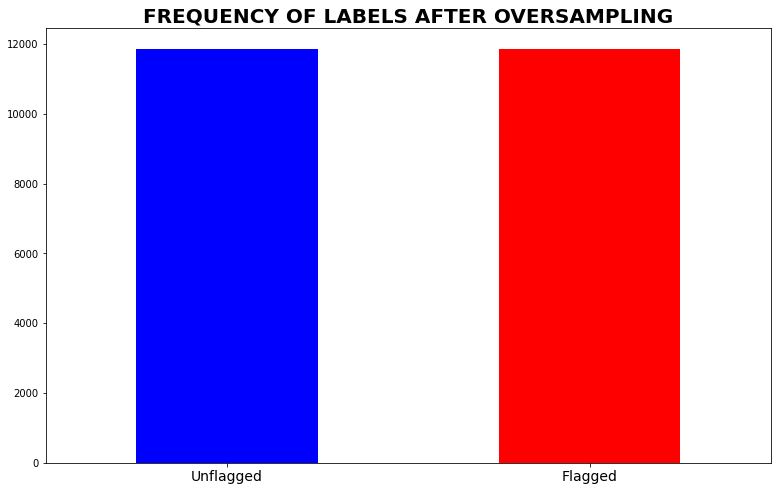

In [38]:
plt.figure(figsize=(13, 8))
y.value_counts().plot(kind='bar', color=['blue', 'red'])
plt.xticks(ticks=[0,1], labels=['Unflagged', 'Flagged'], rotation=0, fontsize=14)
plt.title('FREQUENCY OF LABELS AFTER OVERSAMPLING', fontweight='bold', fontsize=20)
plt.show()

# Model Building

In [39]:
# Packages for Model build and training
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Packages for model evaluation
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import plot_confusion_matrix, classification_report

#Library to track time to train model
import time

In [40]:
model_result = {'model': [],
                 'accuracy': [],
                 'precision': [],
                 'recall': [],
                 'f1 score': [],
                 'time(secs)':[]}

In [41]:
def model_build(model, X, y):
    # splitting of dataset into train and test set
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    
    model_result['model'].append(str(model))
    title = 'CONFUSION MATRIX OF '+str(model)
    
    # model fitting and track of time
    start_time = time.time()
    model.fit(X_train, y_train)
    end_time = time.time()
    
    # model predict
    y_pred = model.predict(X_test)
    # storing model performance metrics
    model_result['accuracy'].append(accuracy_score(y_test, y_pred))
    model_result['precision'].append(precision_score(y_test, y_pred, pos_label='1'))
    model_result['recall'].append(recall_score(y_test, y_pred, pos_label='1'))
    model_result['f1 score'].append(f1_score(y_test, y_pred, pos_label='1'))
    model_result['time(secs)'].append((end_time-start_time))
    
    print(classification_report(y_test, y_pred))
    
    # confusion plot
    fig, ax = plt.subplots(figsize=(8,8))
    plot_confusion_matrix(model, X_test, y_test, ax=ax)
    ax.set_xticks([0,1], ['UNFLAGGED', 'FLAGGED'])
    ax.set_yticks([0,1], ['UNFLAGGED', 'FLAGGED'])
    ax.set_xlabel('Predicted Labels', fontsize=15)
    ax.set_ylabel('True Labels', fontsize=15)
    ax.set_title(title)
    
    return model

## Logistic Regression

              precision    recall  f1-score   support

           0       0.85      0.86      0.85      3549
           1       0.86      0.84      0.85      3570

    accuracy                           0.85      7119
   macro avg       0.85      0.85      0.85      7119
weighted avg       0.85      0.85      0.85      7119



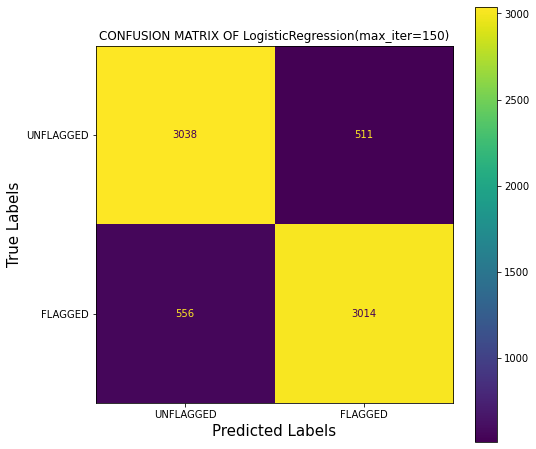

In [43]:
log_reg = LogisticRegression(max_iter=150)
model_1 = model_build(log_reg, X, y)

## Multinomial Naive Bayes

              precision    recall  f1-score   support

           0       0.84      0.80      0.82      3549
           1       0.81      0.85      0.83      3570

    accuracy                           0.82      7119
   macro avg       0.83      0.82      0.82      7119
weighted avg       0.83      0.82      0.82      7119



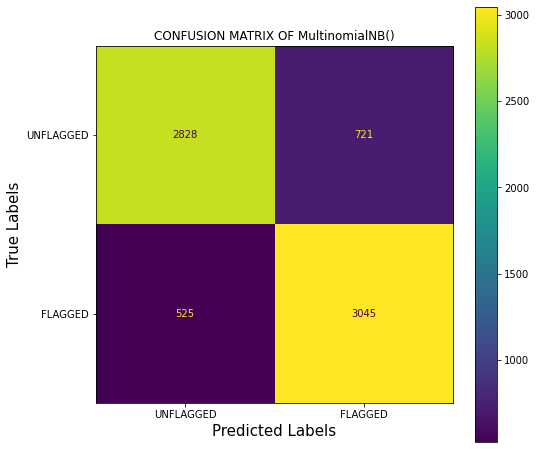

In [44]:
multiNB = MultinomialNB()
model_2 = model_build(multiNB, X, y)

## Support vector classifier

              precision    recall  f1-score   support

           0       0.93      0.98      0.96      3549
           1       0.98      0.93      0.95      3570

    accuracy                           0.95      7119
   macro avg       0.96      0.95      0.95      7119
weighted avg       0.96      0.95      0.95      7119



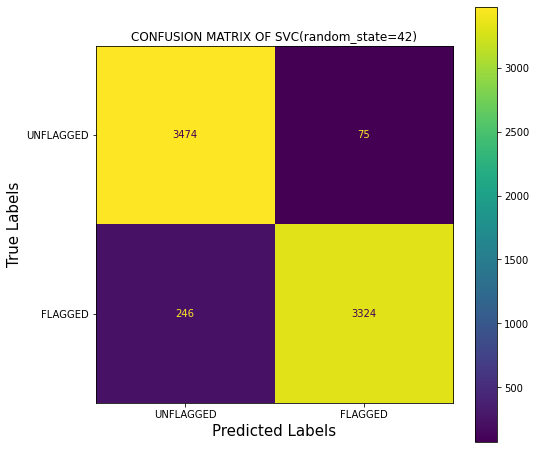

In [45]:
svc = SVC(random_state=42)
model_3 = model_build(svc, X, y)

## Decision Trees classifier

              precision    recall  f1-score   support

           0       0.90      0.89      0.90      3549
           1       0.89      0.90      0.90      3570

    accuracy                           0.90      7119
   macro avg       0.90      0.90      0.90      7119
weighted avg       0.90      0.90      0.90      7119



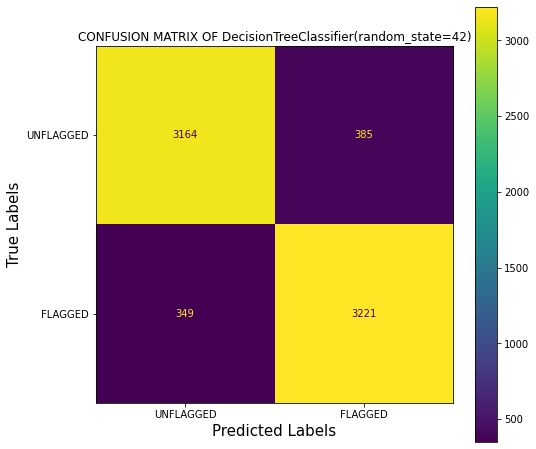

In [46]:
dec_tree = DecisionTreeClassifier(random_state=42)
model_4 = model_build(dec_tree, X, y)

## Random Forest classifier

              precision    recall  f1-score   support

           0       0.93      0.91      0.92      3549
           1       0.91      0.93      0.92      3570

    accuracy                           0.92      7119
   macro avg       0.92      0.92      0.92      7119
weighted avg       0.92      0.92      0.92      7119



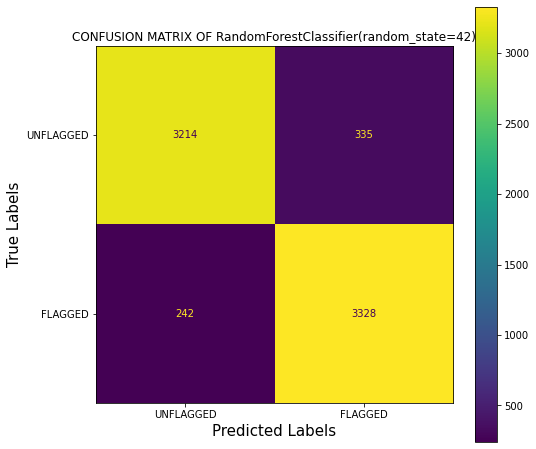

In [47]:
rfc = RandomForestClassifier(random_state=42)
model_5 = model_build(rfc, X, y)

# Model Evaluation

In [48]:
model_result

{'model': ['LogisticRegression(max_iter=150)',
  'MultinomialNB()',
  'SVC(random_state=42)',
  'DecisionTreeClassifier(random_state=42)',
  'RandomForestClassifier(random_state=42)'],
 'accuracy': [0.8501193987919652,
  0.8249754178957719,
  0.9549093973872735,
  0.8968956314089057,
  0.9189492906307065],
 'precision': [0.8550354609929078,
  0.8085501858736059,
  0.9779346866725508,
  0.8932334997226844,
  0.9085449085449085],
 'recall': [0.8442577030812325,
  0.8529411764705882,
  0.9310924369747899,
  0.9022408963585434,
  0.9322128851540616],
 'f1 score': [0.8496124031007751,
  0.8301526717557253,
  0.9539388721480843,
  0.8977146042363433,
  0.9202267385593806],
 'time(secs)': [0.37372827529907227,
  0.05796384811401367,
  43.672102212905884,
  1.819730520248413,
  32.20407271385193]}

In [49]:
result = pd.DataFrame(model_result)
result = pd.DataFrame(['Log Reg.', 'MultiNB', 'SVC', 'Dec Trees', 'RandomForest'], columns=['short name']).join(result)
result.set_index('model', inplace=True)
result

,short name,accuracy,precision,recall,f1 score,time(secs)
model,,,,,,
LogisticRegression(max_iter=150),Log Reg.,0.850119,0.855035,0.844258,0.849612,0.373728
MultinomialNB(),MultiNB,0.824975,0.808550,0.852941,0.830153,0.057964
SVC(random_state=42),SVC,0.954909,0.977935,0.931092,0.953939,43.672102
DecisionTreeClassifier(random_state=42),Dec Trees,0.896896,0.893233,0.902241,0.897715,1.819731
RandomForestClassifier(random_state=42),RandomForest,0.918949,0.908545,0.932213,0.920227,32.204073


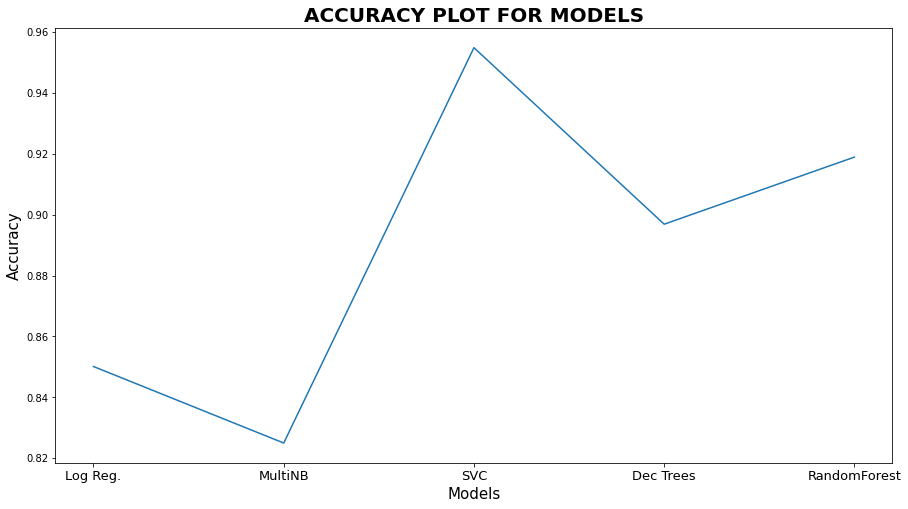

In [50]:
plt.figure(figsize=(15,8))
result['accuracy'].plot()
plt.xticks(range(len(result)), result['short name'], fontsize=13)
plt.title('ACCURACY PLOT FOR MODELS', fontsize=20, fontweight='bold')
plt.xlabel('Models', fontsize=15)
plt.ylabel('Accuracy', fontsize=15);

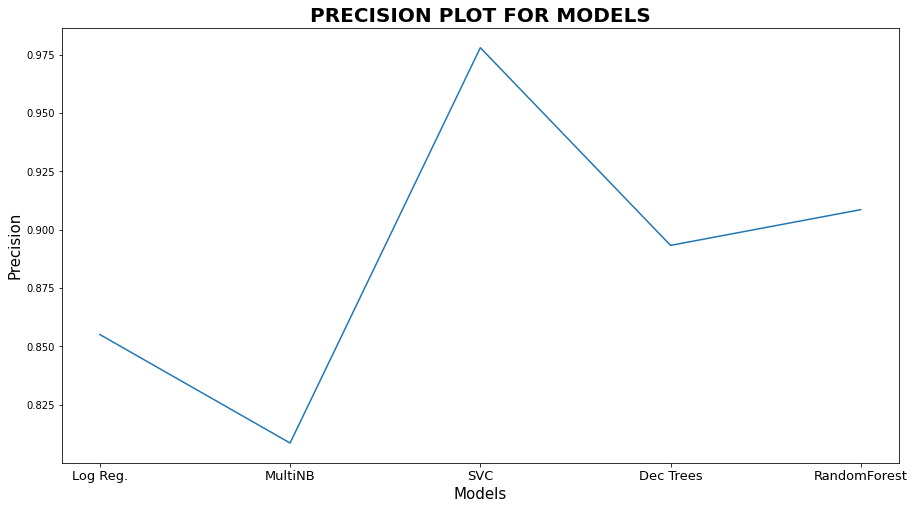

In [51]:
plt.figure(figsize=(15,8))
result['precision'].plot()
plt.xticks(range(len(result)), result['short name'], fontsize=13)
plt.title('PRECISION PLOT FOR MODELS', fontsize=20, fontweight='bold')
plt.xlabel('Models', fontsize=15)
plt.ylabel('Precision', fontsize=15);

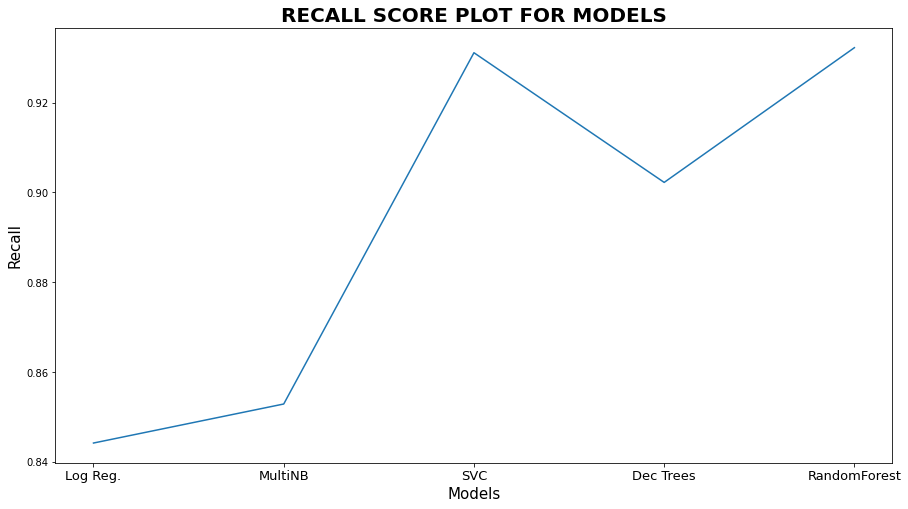

In [52]:
plt.figure(figsize=(15,8))
result['recall'].plot()
plt.xticks(range(len(result)), result['short name'], fontsize=13)
plt.title('RECALL SCORE PLOT FOR MODELS', fontsize=20, fontweight='bold')
plt.xlabel('Models', fontsize=15)
plt.ylabel('Recall', fontsize=15);

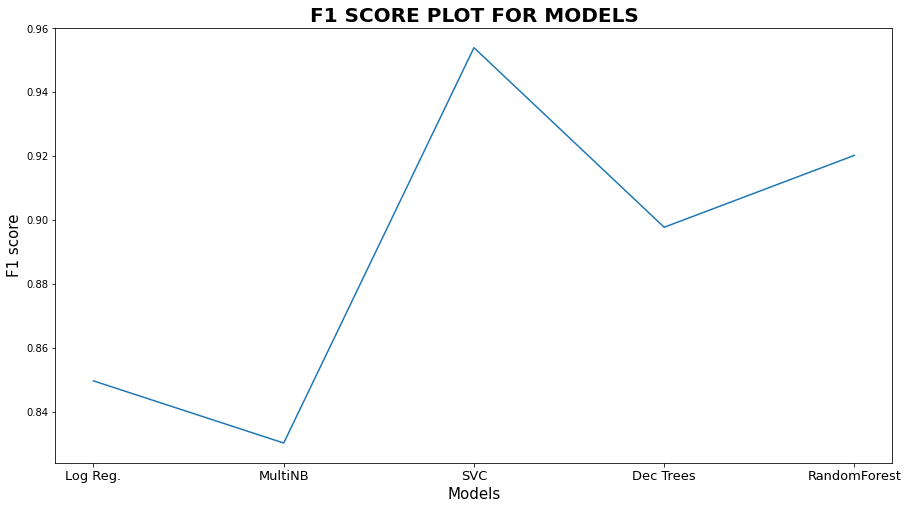

In [53]:
plt.figure(figsize=(15,8))
result['f1 score'].plot()
plt.xticks(range(len(result)), result['short name'], fontsize=13)
plt.title('F1 SCORE PLOT FOR MODELS', fontsize=20, fontweight='bold')
plt.xlabel('Models', fontsize=15)
plt.ylabel('F1 score', fontsize=15);

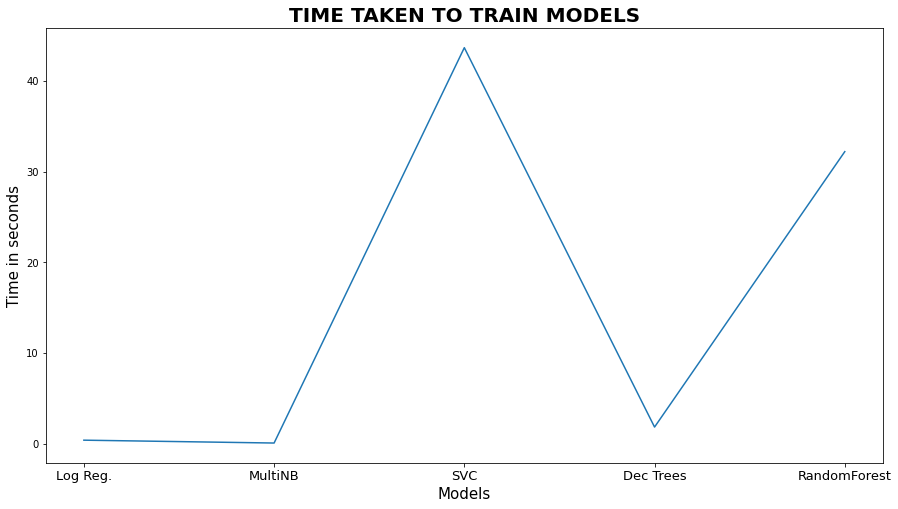

In [54]:
plt.figure(figsize=(15,8))
result['time(secs)'].plot()
plt.xticks(range(len(result)), result['short name'], fontsize=13)
plt.title('TIME TAKEN TO TRAIN MODELS', fontsize=20, fontweight='bold')
plt.xlabel('Models', fontsize=15)
plt.ylabel('Time in seconds', fontsize=15);

### Model Testing

In [55]:
new = tfidf.transform([sent_processor('suck my ass')])
print(new)
svc.predict(new)

  (0, 9915)	0.729949285722809
  (0, 570)	0.6835013096350004


array(['1'], dtype=object)

In [56]:
new = tfidf.transform([sent_processor('you my guy, i swear')])
print(new)
svc.predict(new)

  (0, 10020)	0.8214638950853065
  (0, 4491)	0.5702605273655863


array(['0'], dtype=object)

# Saving Model for Deployment  via pickle

In [57]:
import pickle

In [58]:
# saving the Tfidf vectorizer

pickle.dump(tfidf, open('tfidf_vectorizer.pkl', 'wb'))

In [59]:
# saving the SVC model

pickle.dump(svc, open('svc_model.pkl', 'wb'))